<a href="https://colab.research.google.com/github/tlysenko/cbh21-protein-solubility-challenge/blob/main/Regression_baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing the libraries

In [186]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn import metrics

from scipy.stats import pearsonr

import matplotlib.pyplot as plt
%matplotlib inline

# Data Preparation

### Train.csv

In [319]:
root_path = '/content/drive/MyDrive/CBH/Model_0.2/'
df = pd.read_csv(root_path + 'data/train.csv')

#Features PFAM
df_pfam = pd.read_csv(root_path + 'data/features_pfam.csv')

# PhysProp features
df_pp = pd.read_csv(root_path +'data/features_phys_prop.csv')

#Protdes features
df_protdes = pd.read_csv(root_path +'data/features_protdes_combined.csv')

# Merging the data
df_main = pd.merge(df, df_pfam, on='id')
df_main = pd.merge(df_main, df_pp, on='id')
df_main = pd.merge(df_main, df_protdes, on = 'id')

df_main = df_main.fillna(0)


print('pfam', df_pfam.shape)
print('df', df.shape)
print('df_pp', df_pp.shape)
print('df_main',df_main.shape)
print(df_pfam.shape[1] + df_pp.shape[1] + df_protdes.shape[1])

pfam (1065, 1054)
df (406, 3)
df_pp (1065, 26)
df_main (406, 1228)
1228


In [287]:
df_main.head()

,id,seq,solubility,pfam_1,pfam_2,pfam_3,pfam_4,pfam_5,pfam_6,pfam_7,pfam_8,pfam_9,pfam_10,pfam_11,pfam_12,pfam_13,pfam_14,pfam_15,pfam_16,pfam_17,pfam_18,pfam_19,pfam_20,pfam_21,pfam_22,pfam_23,pfam_24,pfam_25,pfam_26,pfam_27,pfam_28,pfam_29,pfam_30,pfam_31,pfam_32,pfam_33,pfam_34,pfam_35,pfam_36,pfam_37,...,_PolarityD2001,_PolarityD2025,_PolarityD2050,_PolarityD2075,_PolarityD2100,_PolarityD3001,_PolarityD3025,_PolarityD3050,_PolarityD3075,_PolarityD3100,_NormalizedVDWVD1001,_NormalizedVDWVD1025,_NormalizedVDWVD1050,_NormalizedVDWVD1075,_NormalizedVDWVD1100,_NormalizedVDWVD2001,_NormalizedVDWVD2025,_NormalizedVDWVD2050,_NormalizedVDWVD2075,_NormalizedVDWVD2100,_NormalizedVDWVD3001,_NormalizedVDWVD3025,_NormalizedVDWVD3050,_NormalizedVDWVD3075,_NormalizedVDWVD3100,_HydrophobicityD1001,_HydrophobicityD1025,_HydrophobicityD1050,_HydrophobicityD1075,_HydrophobicityD1100,_HydrophobicityD2001,_HydrophobicityD2025,_HydrophobicityD2050,_HydrophobicityD2075,_HydrophobicityD2100,_HydrophobicityD3001,_HydrophobicityD3025,_HydrophobicityD3050,_HydrophobicityD3075,_HydrophobicityD3100
0,P0AFP6,MKNTELEQLINEKLNSAAISDYAPNGLQVEGKETVQKIVTGVTASQ...,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,8.333,41.667,8.333,8.333,41.667,0.000,0.000,0.000,0.000,0.000,8.333,41.667,8.333,25.000,41.667,0.000,0.000,0.000,0.000,0.000,33.333,33.333,33.333,33.333,33.333,0.000,0.000,0.000,0.000,0.000,8.333,41.667,8.333,25.000,41.667,33.333,33.333,33.333,33.333,33.333
1,P00370,MDQTYSLESFLNHVQKRDPNQTEFAQAVREVMTTLWPFLEQNPKYR...,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,8.333,8.333,8.333,8.333,8.333,33.333,33.333,33.333,33.333,33.333,8.333,8.333,8.333,8.333,8.333,0.000,0.000,0.000,0.000,0.000,33.333,33.333,33.333,33.333,33.333,0.000,0.000,0.000,0.000,0.000,8.333,8.333,8.333,8.333,8.333,33.333,33.333,33.333,33.333,33.333
2,P0ABD3,MKGDTKVINYLNKLLGNELVAINQYFLHARMFKNWGLKRLNDVEYH...,96,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,8.333,8.333,8.333,8.333,8.333,50.000,50.000,50.000,50.000,50.000,8.333,41.667,8.333,25.000,41.667,0.000,0.000,0.000,0.000,0.000,50.000,50.000,50.000,50.000,50.000,41.667,41.667,41.667,41.667,41.667,8.333,25.000,8.333,8.333,25.000,50.000,50.000,50.000,50.000,50.000
3,Q46891,MPRFAANLSMMFTEVPFIERFAAARKAGFDAVEFLFPYNYSTLQIQ...,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,8.333,8.333,8.333,8.333,8.333,0.000,0.000,0.000,0.000,0.000,50.000,50.000,50.000,50.000,50.000,8.333,8.333,8.333,8.333,8.333,0.000,0.000,0.000,0.000,0.000,8.333,50.000,8.333,8.333,50.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,P0A763,AIERTFSIIKPNAVAKNVIGNIFARFEAAGFKIVGTKMLHLTVEQA...,65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,8.333,8.333,8.333,8.333,8.333,50.000,50.000,50.000,50.000,50.000,8.333,25.000,8.333,8.333,25.000,0.000,0.000,0.000,0.000,0.000,50.000,50.000,50.000,50.000,50.000,0.000,0.000,0.000,0.000,0.000,8.333,25.000,8.333,8.333,25.000,50.000,50.000,50.000,50.000,50.000


### X and Y variables

In [242]:
Y = df_main['solubility']
X = df_main.drop(['solubility', 'seq','id'], axis = 1)

In [243]:
print(X.shape, y.shape)

(406, 1225) (406,)


### Train-test-split

In [244]:
X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.23, random_state=42)

In [245]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)  

(312, 1225) (312,)
(94, 1225) (94,)


### Scale the data

In [246]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Model Training

### Liner Model

In [247]:
model = LinearRegression().fit(X_train, y_train)

# Inference

In [248]:
prediction_LR = model.predict(X_test)

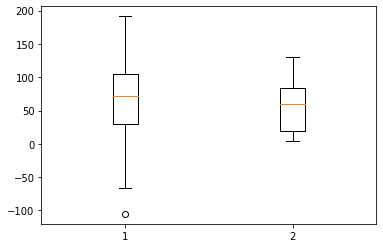

In [249]:
plt.boxplot([prediction_LR, y_test]);

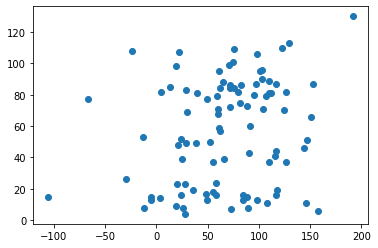

In [250]:
plt.scatter(prediction_LR, y_test);

In [252]:
pearsonr(prediction_LR, y_test)

(0.2247441630617983, 0.029423757312444267)

# test.csv inference

In [324]:
root_path = '/content/drive/MyDrive/CBH/Model_0.2/'
df = pd.read_csv(root_path + 'data/test.csv')

#Features PFAM
df_pfam = pd.read_csv(root_path + 'data/features_pfam.csv')

# PhysProp features
df_pp = pd.read_csv(root_path +'data/features_phys_prop.csv')

#Protdes features
df_protdes = pd.read_csv(root_path +'data/features_protdes_combined.csv')

# Merging the data
df_main = pd.merge(df, df_pfam, on='id')
df_main = pd.merge(df_main, df_pp, on='id')
df_main = pd.merge(df_main, df_protdes, on = 'id')
df_main = df_main.fillna(0)

df_main.shape

print('pfam', df_pfam.shape)
print('df', df.shape)
print('df_pp', df_pp.shape)
print('df_main',df_main.shape)
print(df_pfam.shape[1] + df_pp.shape[1] + df_protdes.shape[1])

pfam (1065, 1054)
df (659, 2)
df_pp (1065, 26)
df_main (659, 1227)
1228


In [325]:
df_main = df_main.drop(['seq', 'id'], axis = 1)
X_main = sc_X.fit_transform(df_main)

In [327]:
final_pred = model.predict(df_main)

In [339]:
df_submission = pd.DataFrame( [df['id'], final_pred])
df_submission = df_submission.transpose()

In [340]:
df_submission.to_csv(root_path + 'predictions.csv')